# Step 3

### 3.1 K-mean AIDS, PCA

In [52]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA, PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import SparseRandomProjection

# Load UCI AIDS crinical dataset - https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
y=y.cid

In [53]:
n = 6
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.3155228592949331, 0.31076467294950155, 0.2680669146506179, 0.25907584325261357, 0.25773515732969093, 0.23174500577108598, 0.23399588286708198, 0.2425900204690044, 0.23702449868788186]


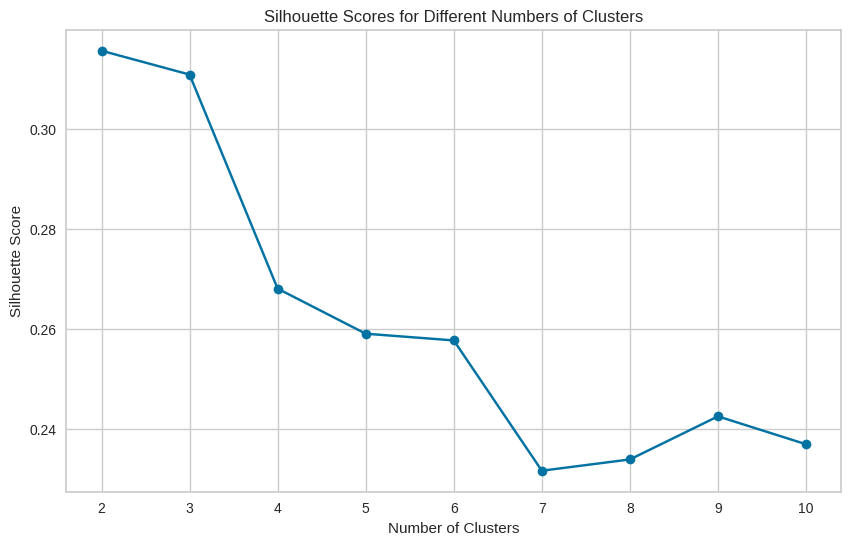

(2, 0.3165957948156324, 0.3131552621286129)

In [54]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

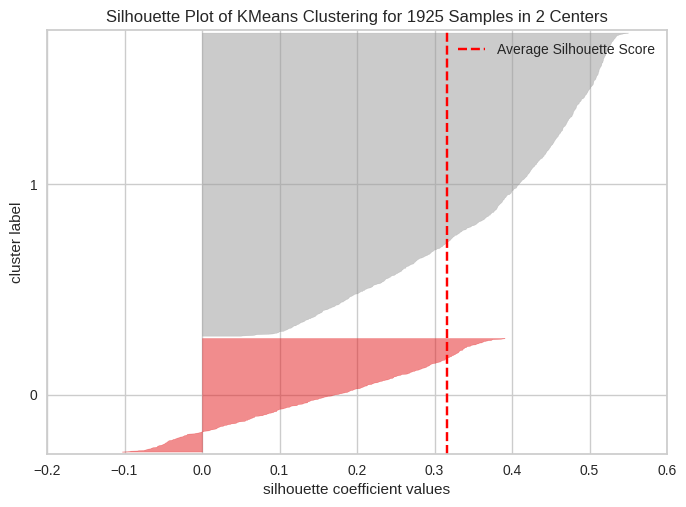

In [55]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

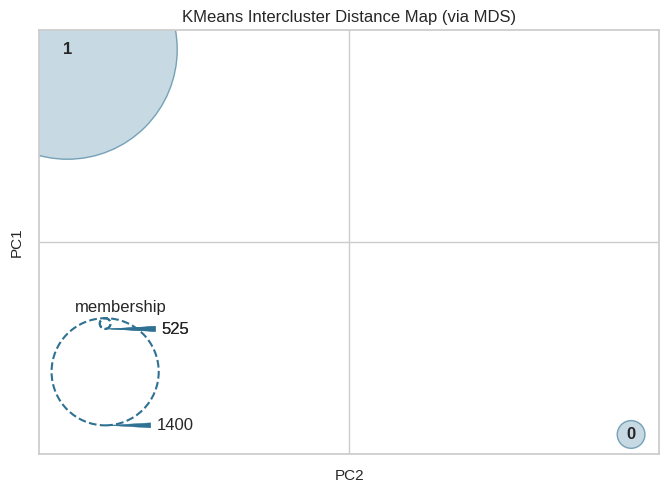

In [56]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.2 K-mean AIDS, ICA

In [57]:
n = 15
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.08316227299048255, 0.088379640903315, 0.08014518069792592, 0.062359204497409726, 0.06879224517633374, 0.05949504833653494, 0.06283345261959693, 0.056853587727698156, 0.05571531287377481]


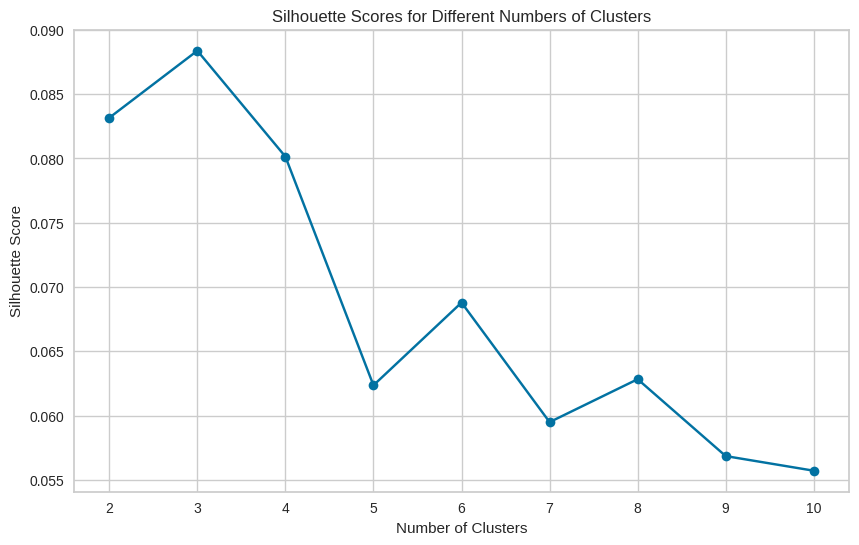

(3, 0.09042191353107035, 0.09457520379950886)

In [58]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

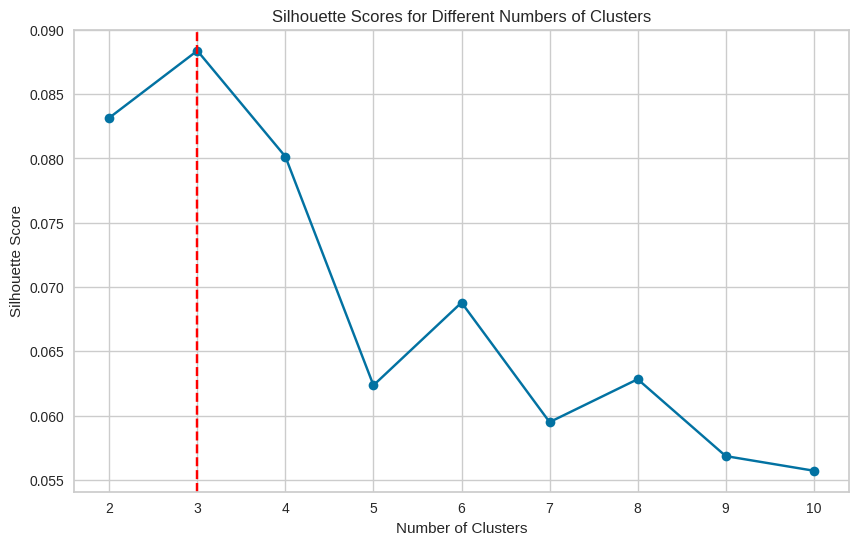

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

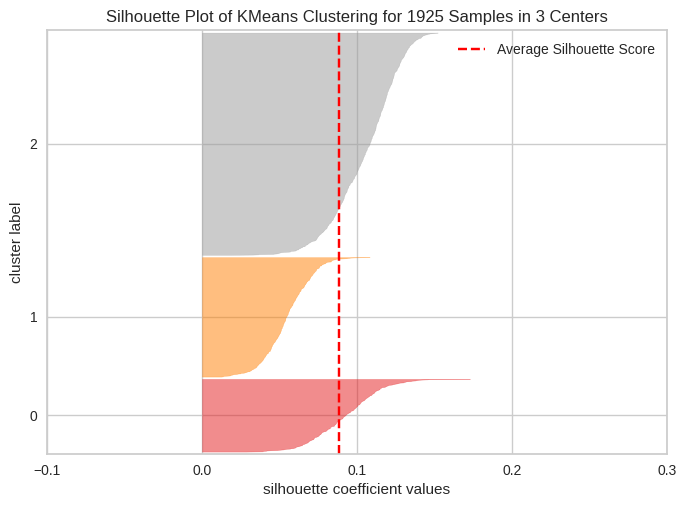

In [60]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

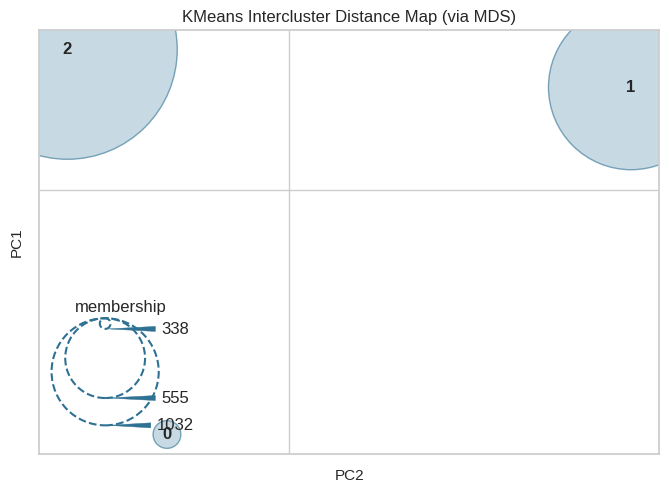

In [61]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.3 K-mean AIDS, RP

In [62]:
n = 8
rp = SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.3316952144439819, 0.339231766271112, 0.31499964805720765, 0.32575081226831487, 0.2772765539670046, 0.2665434870664096, 0.2561968503833678, 0.25715903518240846, 0.2340500901227229]


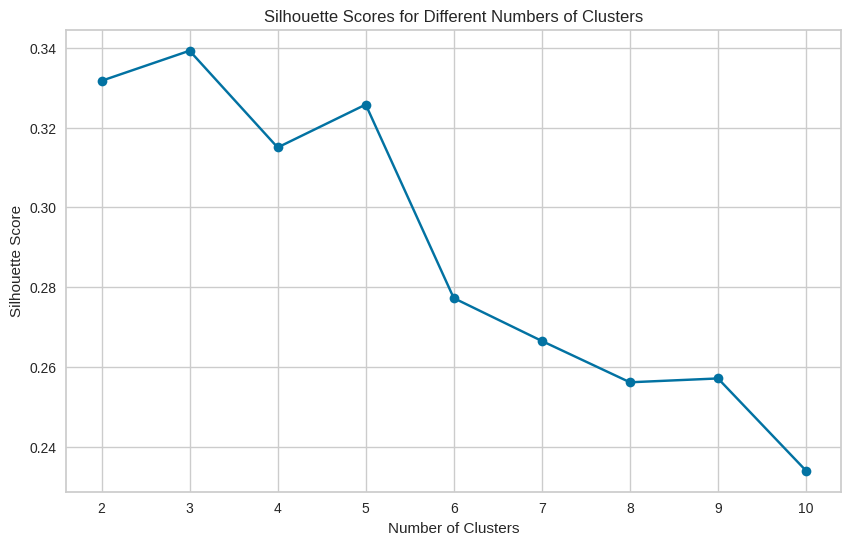

(3, 0.339231766271112, 0.32773202014129965)

In [63]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

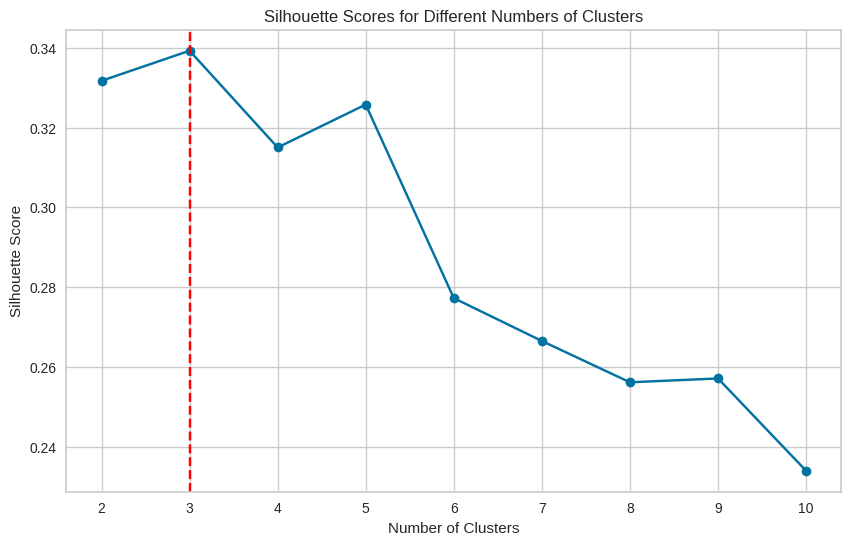

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

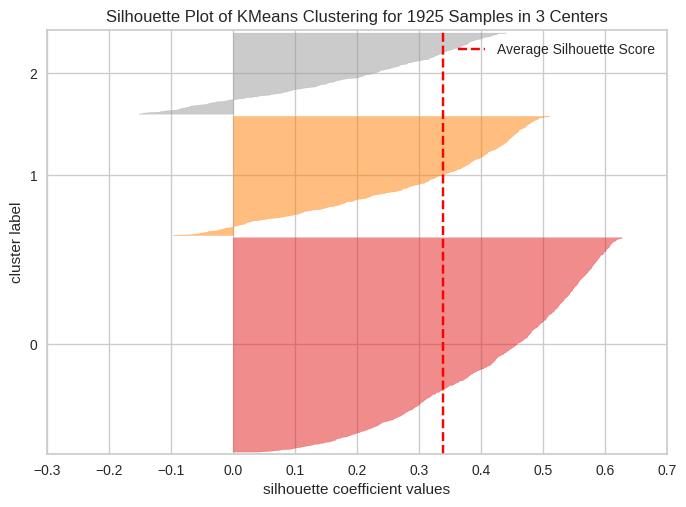

In [65]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

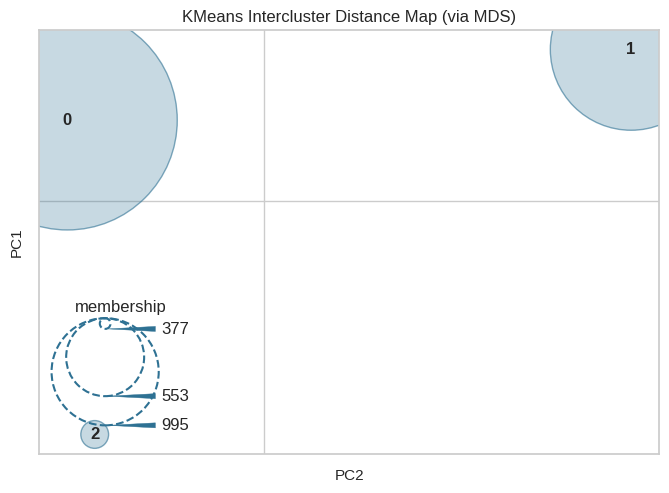

In [66]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.4 K-mean AIDS, SVD

In [67]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.3156622633421653, 0.3110068989948957, 0.268265099605313, 0.25927622510208803, 0.2578261825183163, 0.2313378297619613, 0.23366532680515228, 0.2427148174822771, 0.23446394916582886]


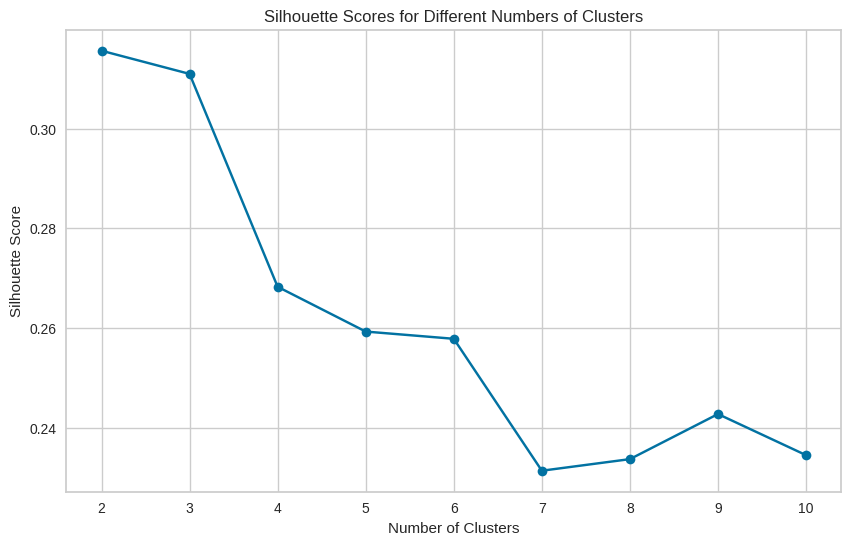

(2, 0.3167332903398681, 0.3133417752977396)

In [68]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

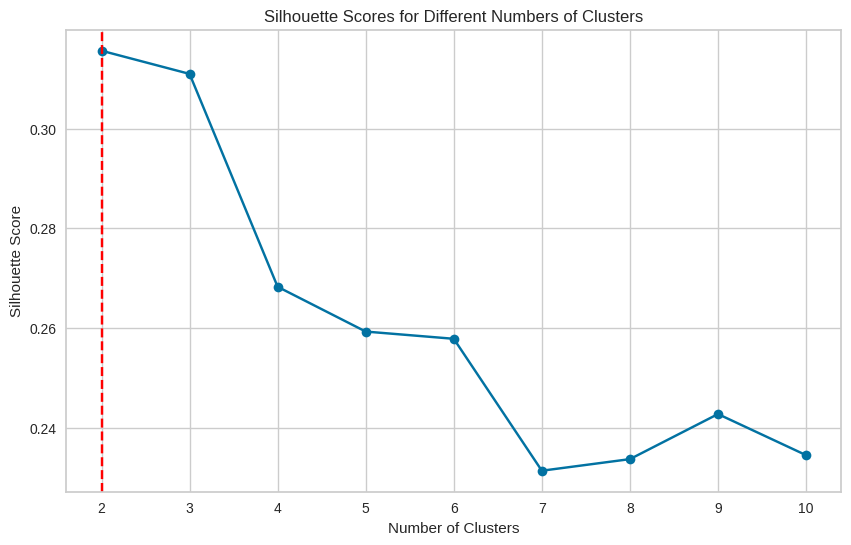

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

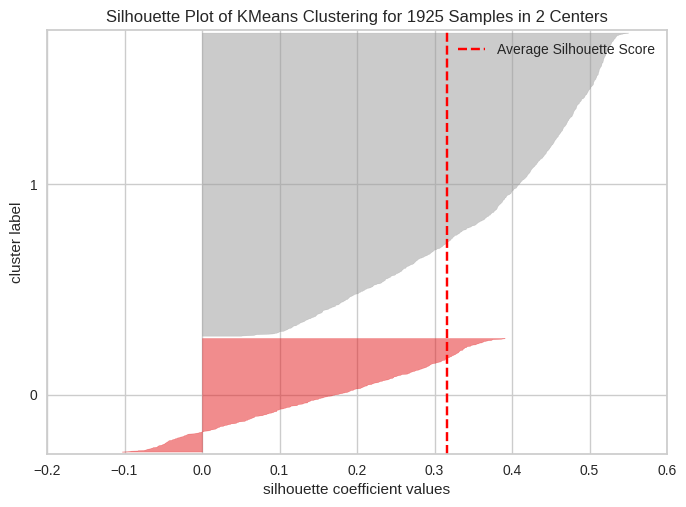

In [70]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

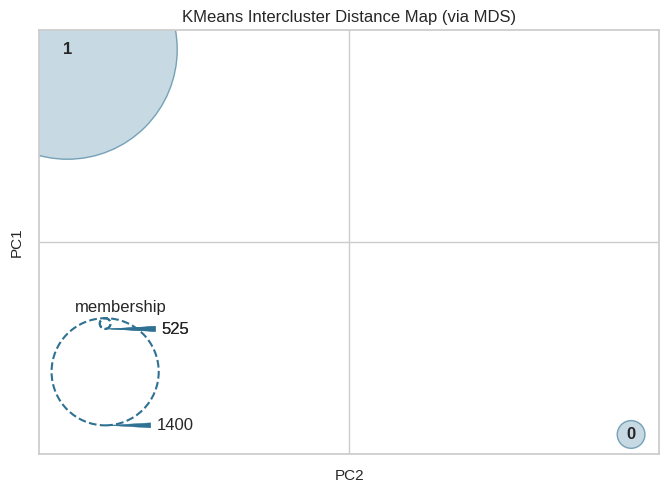

In [71]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.5 EM AIDS, PCA

In [72]:
n = 6
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=100) # 80% training and 30% test

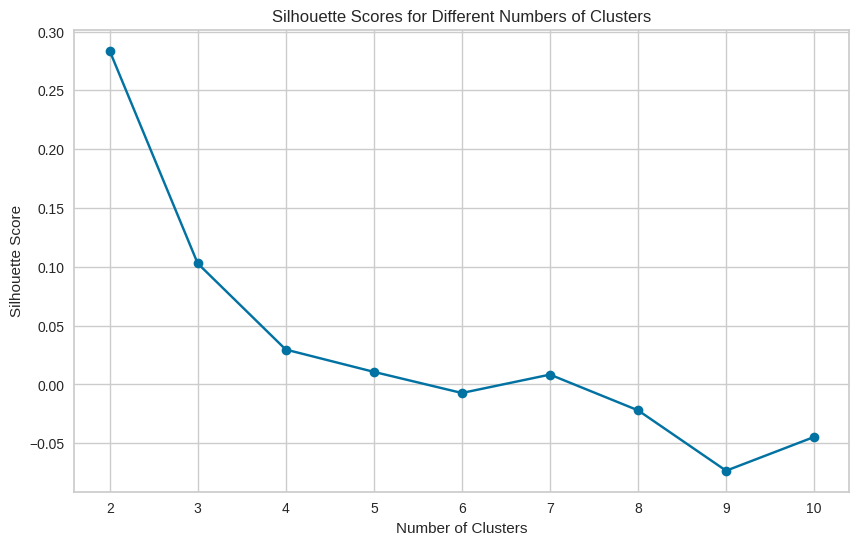

(2, 0.2836951725383738, 0.2778017992281582)

In [73]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

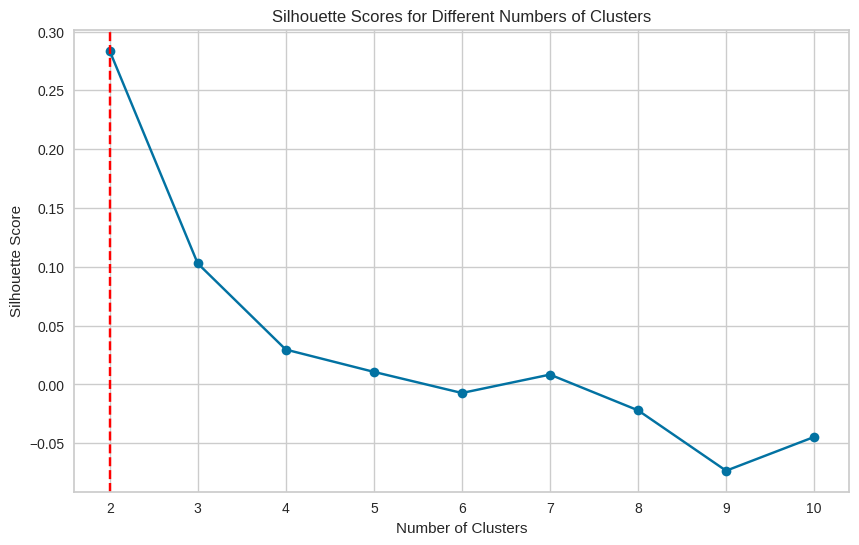

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

In [ ]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

### 3.6 EM AIDS, ICA

In [ ]:
n = 15
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.1, random_state=100) # 80% training and 30% test

In [ ]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

In [ ]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

### 3.7 EM AIDS, RP

In [ ]:
n = 8
rp = SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.1, random_state=100) # 80% training and 30% test

In [ ]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

In [ ]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

### 3.8 EM AIDS, SVD

In [ ]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.1, random_state=100) # 80% training and 30% test

In [ ]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

In [ ]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()